In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential, Input, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# Import the dataset

In [3]:
file_path="data_sampling1000_topstyles.csv"
df = pd.read_csv(file_path)
df.head()

,artist,style,movement,tags,url,img,file_name,genre_list,Artwork,Date
0,Nicolae Vermont,Realism,Realism,['Gentleman'],https://www.wikiart.org/en/nicolae-vermont/por...,https://uploads0.wikiart.org/images/nicolae-ve...,75532-portrait-of-a-man-1918.jpg,['portrait'],NaN,NaN
1,William Hamilton,Neoclassicism,Neoclassicism,['Lady'],https://www.wikiart.org/en/william-hamilton/ol...,https://uploads1.wikiart.org/images/william-ha...,31044-olivia-s-proposal-1796.jpg,['illustration'],NaN,NaN
2,John Singer Sargent,Realism,Realism,"['female-portraits', 'Lady']",https://www.wikiart.org/en/john-singer-sargent...,https://uploads4.wikiart.org/images/john-singe...,73103-the-misses-hunter-1902.jpg,['portrait'],NaN,NaN
3,Lucian Freud,Expressionism,Expressionism,"['male-nude', 'Mythology', 'Male']",https://www.wikiart.org/en/lucian-freud/david-...,https://uploads2.wikiart.org/images/lucian-fre...,137838-david-and-eli-2004.jpg,['nude painting (nu)'],NaN,NaN
4,Ferdinand Hodler,Post-Impressionism,Symbolism,"['lakes-and-ponds', 'Alps', 'mountains', 'Lake...",https://www.wikiart.org/en/ferdinand-hodler/la...,https://uploads0.wikiart.org/images/ferdinand-...,81578-lake-geneva-from-chexbres-1904.jpg,['landscape'],NaN,NaN


In [4]:
list_styles = df['style'].unique().tolist()
list_styles

['Realism',
 'Neoclassicism',
 'Expressionism',
 'Post-Impressionism',
 'Abstract Expressionism',
 'Symbolism',
 'Romanticism',
 'Impressionism',
 'Surrealism',
 'Cubism']

In [5]:
nb_styles = len(list_styles)
nb_styles

10

In [6]:
list_images= df['file_name'].unique().tolist()
list_images

['75532-portrait-of-a-man-1918.jpg',
 '31044-olivia-s-proposal-1796.jpg',
 '73103-the-misses-hunter-1902.jpg',
 '137838-david-and-eli-2004.jpg',
 '81578-lake-geneva-from-chexbres-1904.jpg',
 '213335-tapestry-1962.jpg',
 '70773-woman-with-dagger.jpg',
 '80123-in-the-section-1879.jpg',
 '44910-naples.jpg',
 '104115-san-gabriel-canyon.jpg',
 '65781-nikita-pustosviat-dispute-on-the-confession-of-faith-1881.jpg',
 '182428-the-lady-rose-1934.jpg',
 '51287-blondel-s-quest.jpg',
 '164195-number-180-2007.jpg',
 '44207-coastal-twilight.jpg',
 '101651-idle-hours.jpg',
 '43210-after-the-shipwreck.jpg',
 '99076-hugo-m-hlig-pappelw-ldchen-1906.jpg',
 '132547-not_detected_235896.jpg',
 '101532-news-depot-cos-cob-1912.jpg',
 '108472-druiwepakkers-1960.jpg',
 '94612-nude-sitting-in-the-forest.jpg',
 '100795-in-a-black-coat-1908.jpg',
 '233522-untitled-1983.jpg',
 '85891-pilgrim-1932.jpg',
 '121558-delphinium-and-rose.jpg',
 '136841-unknown-title.jpg',
 '94607-margot-1876.jpg',
 '49618-casa-gotica-in-to

# Images importing and resizing

In [10]:
def load_and_resize_images(image_dir, list_images):
    """
    Charge toutes les images d'un dossier, les redimensionne en conservant le ratio
    avec padding noir et les retourne sous forme de tableau NumPy.
    
    Args:
        image_dir (str): Chemin vers le dossier contenant les images.
        target_size (tuple): Taille finale des images (largeur, hauteur).
        
    Returns:
        np.ndarray: Tableau de forme (n_images, hauteur, largeur, canaux)
    """
    images_list = []
    images_names = []
    
    for filename in list_images:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            images_names.append(filename)
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path).convert('RGB') 

            img_resized = img.resize((128, 128), Image.BICUBIC)
            
            # convert into an array and add to list 
            img_array = np.array(img_resized)
            images_list.append(img_array)
    
    # Convertir la liste en tableau NumPy
    images_np = np.stack(images_list)
    return images_np, images_names

In [13]:
image_dir = "../raw_data/sample1000"
images_np, images_names = load_and_resize_images(image_dir, list_images)

Test on images : 

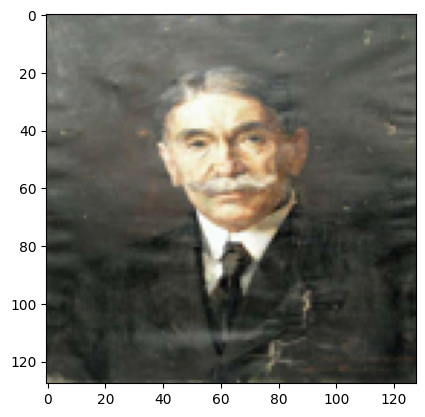

In [14]:
plt.imshow(images_np[0])

In [16]:
len(images_names)

1000

# Define X and Y

In [17]:
X =  np.array(images_np, dtype='float32') / 255.0

In [18]:
y = df['style']

# Train/test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      
    random_state=42,
    stratify=y
)

In [20]:
### Normalizing pixels' intensities
X_train = X_train / 255.
X_test = X_test / 255.

In [21]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [22]:
### Encoding the labels
y_train_cat = to_categorical(y_train_encoded, 10).astype('float32')
y_test_cat = to_categorical(y_test_encoded, 10).astype('float32')

# Initialize a model1

In [29]:
def initialize_model(nb_styles):
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model = Sequential()
    model.add(Input(shape=(128, 128, 3)))

    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())  # normalisation pour stabiliser l'apprentissage
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25)) 

     # Bloc 2
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))

     # Bloc 3
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())  
    model.add(layers.Dense(256, activation='relu')) 
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(nb_styles, activation='softmax'))

    return model

In [30]:
def compile_model(model):
    '''return a compiled model suited for the CIFAR-10 task'''
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [31]:
model = compile_model(initialize_model(nb_styles))

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,486,602 (32.37 MB)

 Trainable params: 8,485,642 (32.37 MB)

 Non-trainable params: 960 (3.75 KB)

# Train the model1

In [33]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [34]:
es = EarlyStopping(patience = 3)
history = model.fit(X_train, y_train_cat, epochs=25, callbacks = [es], validation_split = 0.2, batch_size=32)

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1482 - loss: 3.1822 - val_accuracy: 0.2071 - val_loss: 2.8728
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 882ms/step - accuracy: 0.2500 - loss: 2.7074 - val_accuracy: 0.2071 - val_loss: 3.4296
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 917ms/step - accuracy: 0.3089 - loss: 2.3883 - val_accuracy: 0.1071 - val_loss: 3.0605
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 842ms/step - accuracy: 0.3196 - loss: 2.2104 - val_accuracy: 0.0714 - val_loss: 2.7964
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 804ms/step - accuracy: 0.4054 - loss: 1.9017 - val_accuracy: 0.0714 - val_loss: 2.9679
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 801ms/step - accuracy: 0.4482 - loss: 1.7197 - val_accuracy: 0.2071 - val_loss: 3.4641
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 883ms/step - accuracy: 0.5196 - loss: 1.5150 - val_accuracy: 0.1643 - val_loss: 4.7643


(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

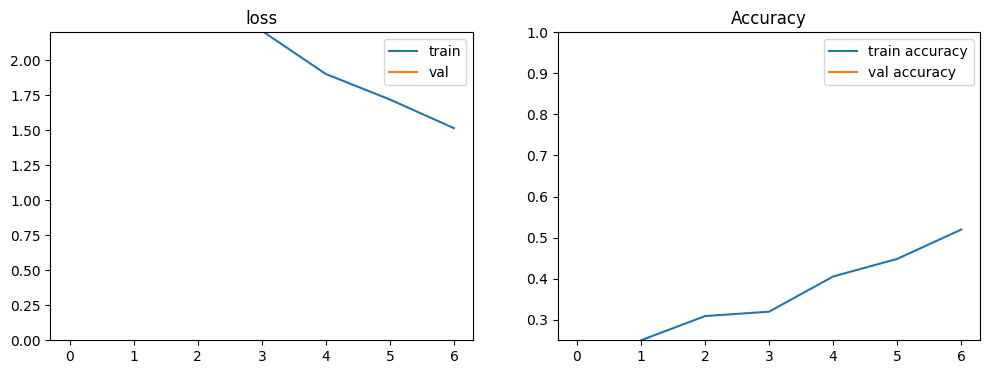

In [36]:
plot_history(history)